In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_excel('Canada.xlsx', skiprows=20,
skipfooter=2, sheet_name='Canada by Citizenship')

In [20]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [21]:
cols_to_drop = ['Type', 'Coverage','AREA', 'REG', 'DEV']
df.drop(columns = cols_to_drop, inplace = True)

In [22]:
print(df.columns.to_list())

['OdName', 'AreaName', 'RegName', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [23]:
df.rename( columns={
    'OdName': 'Country', 'AreaName': 'Continent',
    'RegName': 'Region', 'DevName': 'Status'},
inplace=True)


In [24]:
df.head(3)

,Country,Continent,Region,Status,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [25]:
years = list(range(1980,2014))
print(years)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [26]:
df[ 'Total'] = df[years].sum(axis=1)

In [27]:
df.head(3)

,Country,Continent,Region,Status,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [28]:
df.set_index('Country', inplace=True)

<AxesSubplot: xlabel='Country'>

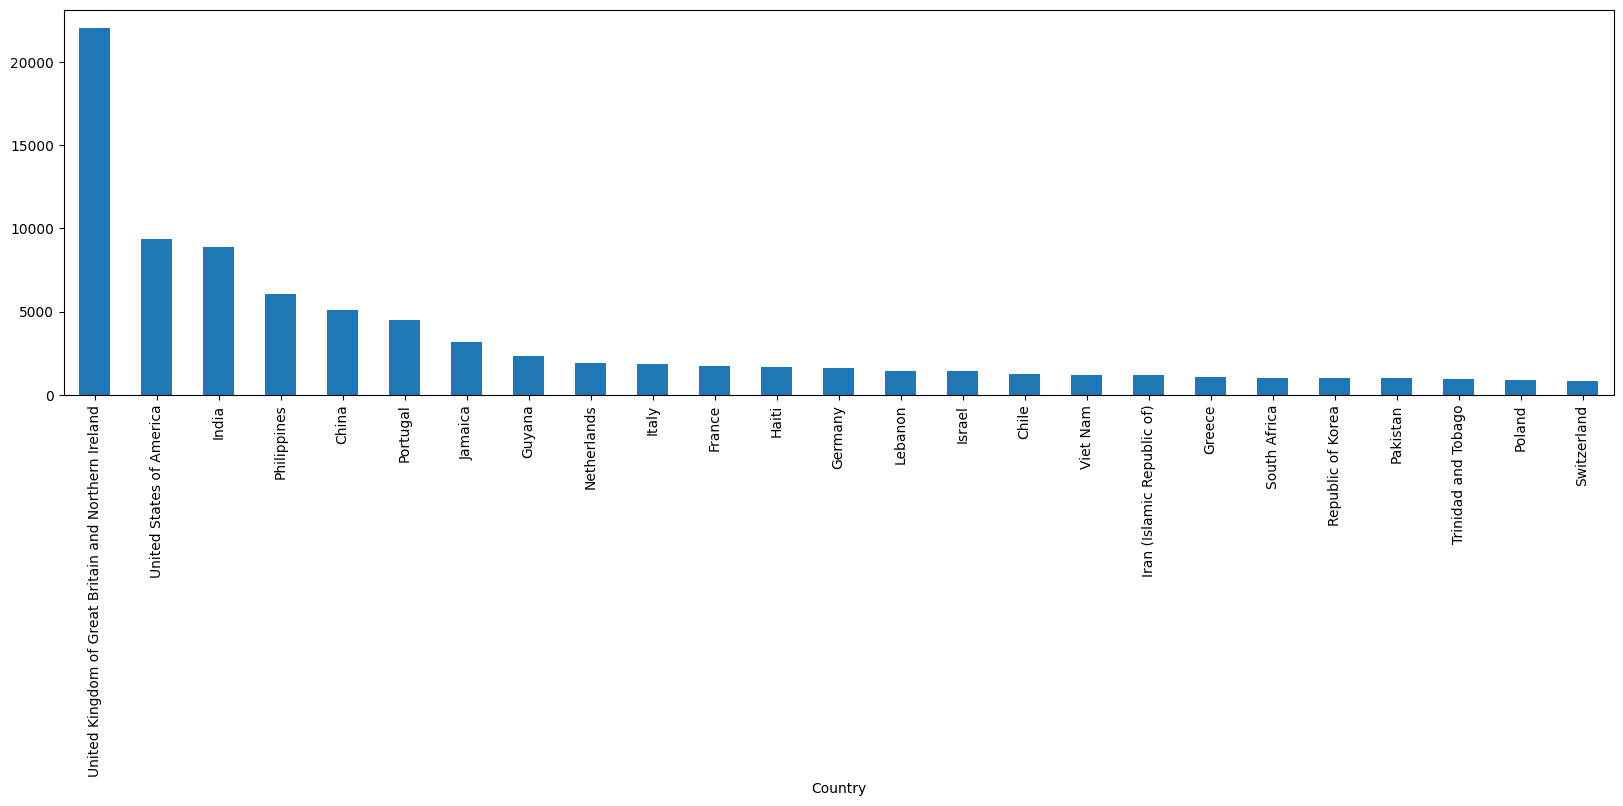

In [29]:
df.sort_values(by=1980, ascending=False).head(25)[1980].plot(kind='bar', figsize=(20,5))

<AxesSubplot: xlabel='Country'>

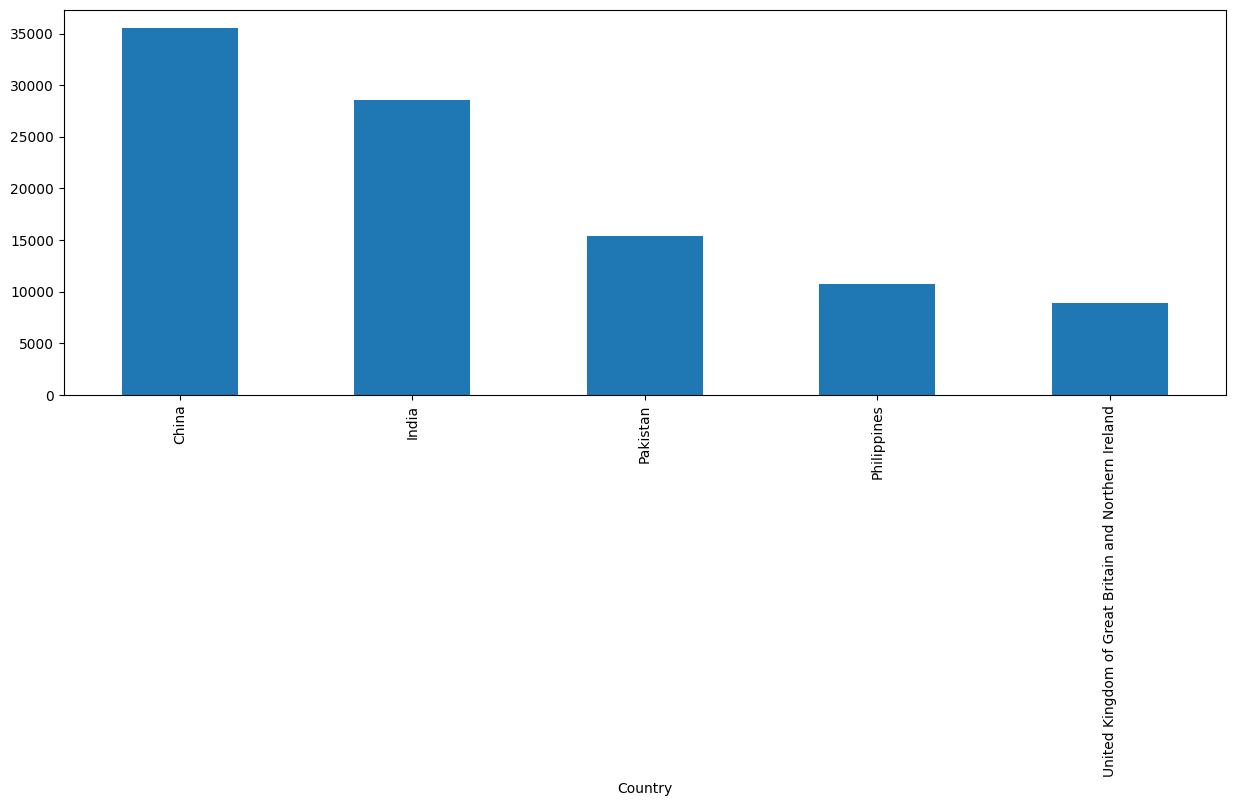

In [30]:
df.sort_values(by=2000, ascending=False).head(5)[2000].plot(kind='bar', figsize=(15,5))

<AxesSubplot: xlabel='Country'>

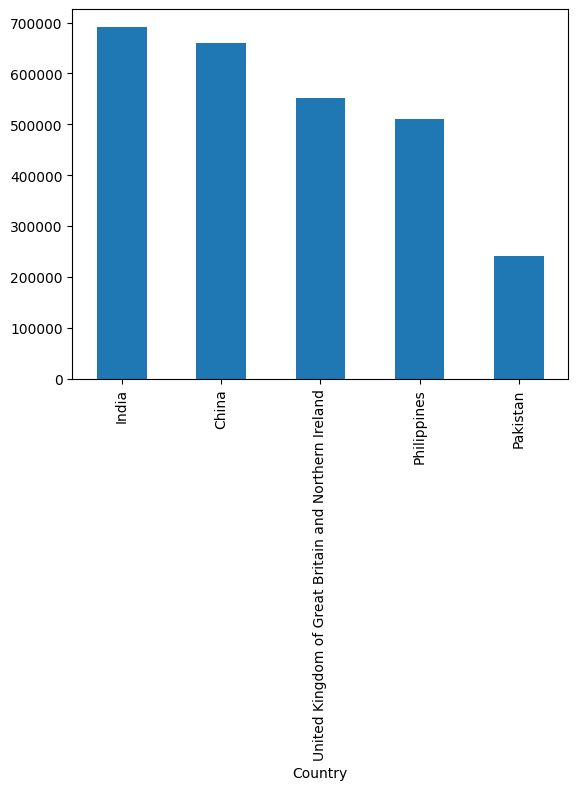

In [31]:
df.sort_values(by='Total', ascending=False).head(5)['Total'].plot(kind='bar')

<AxesSubplot: title={'center': 'Japan Immigration Trend'}>

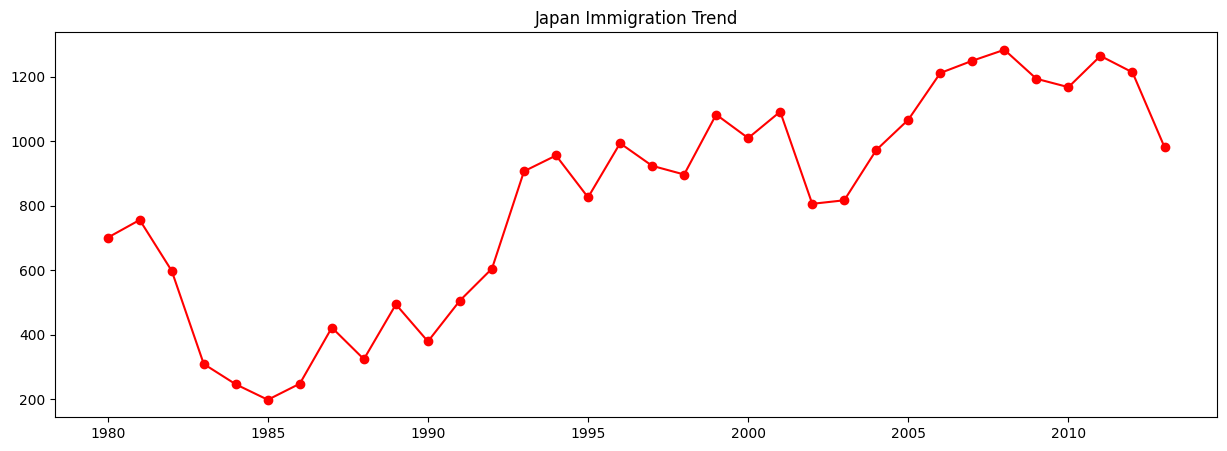

In [32]:
df.loc['Japan', years].plot(kind='line', 
style='ro-', title='Japan Immigration Trend', figsize=(15,5))

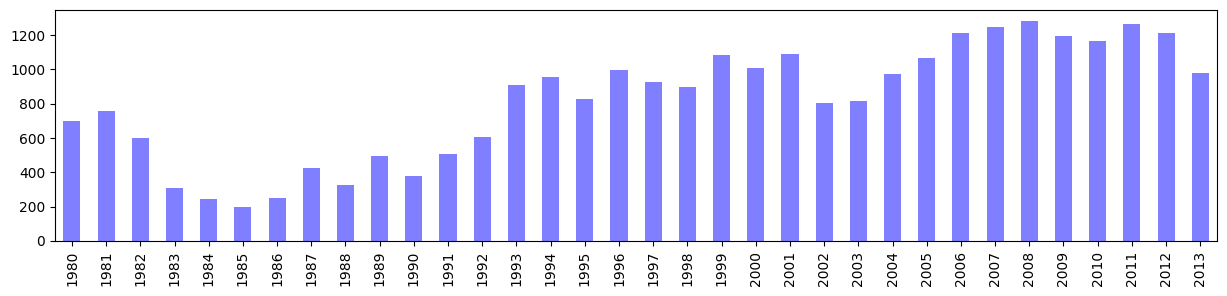

In [33]:
ax = df.loc['Japan', years].plot(kind='bar', color='blue', alpha=0.5, figsize=(15,3))

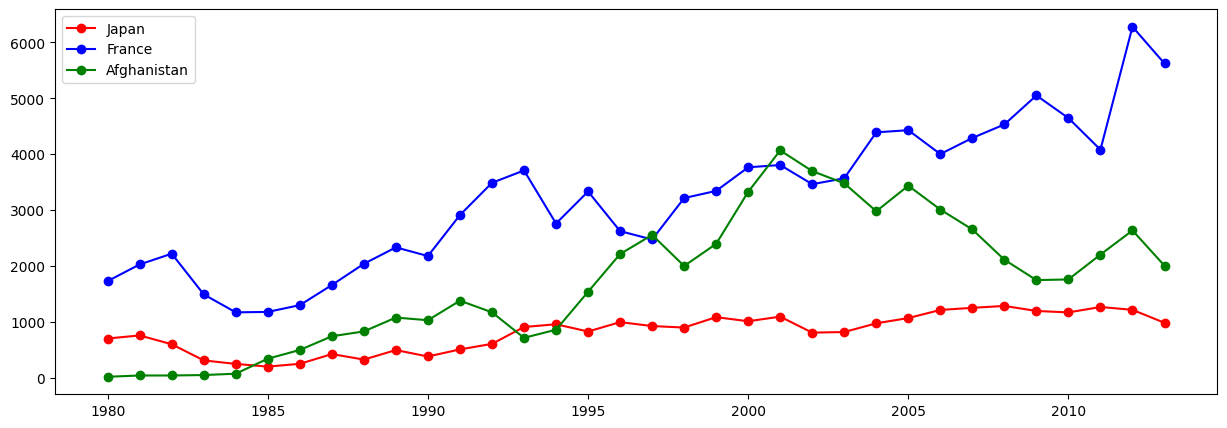

In [35]:
#comparision b/w  japan france afganistan on total immigration
df.loc['Japan', years].plot(kind='line',style='ro-',label='Japan',figsize=(15,5))
df.loc['France', years].plot(kind='line', style='bo-',label='France',figsize=(15,5))
df.loc['Afghanistan', years].plot(kind='line', style='go-',label='Afghanistan',figsize=(15,5)).legend()
